## seaborn 시각화

<Axes: xlabel='class', ylabel='sex'>

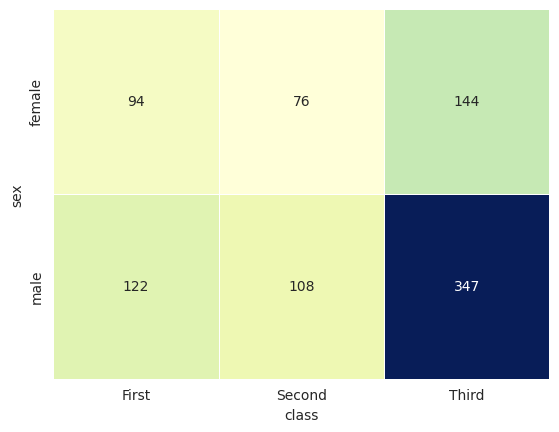

In [3]:
# 데이터 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
# 스타일 테마
sns.set_style("whitegrid")

# 피벗 테이블로 범주형 변수를 행과 열 형태로 정리
table = titanic.pivot_table(index="sex",columns="class",aggfunc="size")
# 히트맵
sns.heatmap(table,
            annot=True, # 데이터 값 표시 여부
            fmt="d", # 숫자 표현 방식 지정 : d = 정수형
            cmap="YlGnBu", # 컬러맵
            linewidth=.5, # 구분선
            cbar=False) # 컬러바 표시 여부

##범주형 데이터의 산점도

Text(0.5, 1.0, 'swarm plot')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


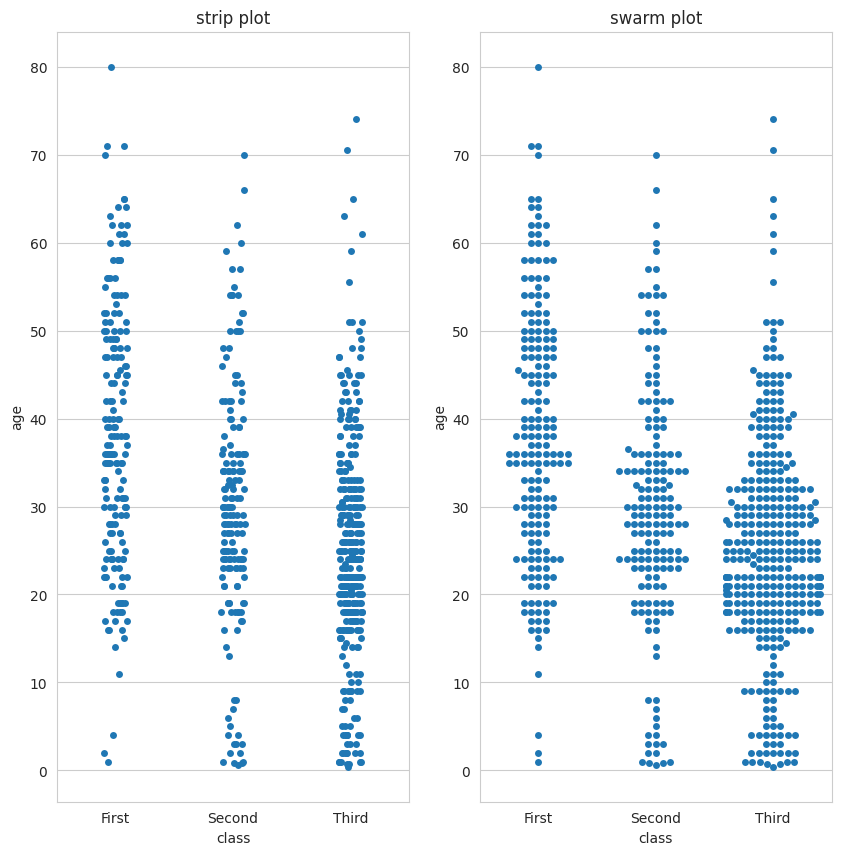

In [36]:
# 범주형 데이터 산점도
# 그래프 객체 생성
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# 범주형 변수 산점도.

# 1) 분산 고려하지 않는 경우
sns.stripplot(x="class",
              y="age",
              data=titanic,
              ax=ax1)
# 2) 분산 고려하는 경우
sns.swarmplot(x="class",
              y="age",
              data=titanic,
              ax=ax2)
# 제목 추가
ax1.set_title("strip plot")
ax2.set_title("swarm plot")

## 빈도 그래프

Text(0.5, 1.0, 'sex/class(checked)')

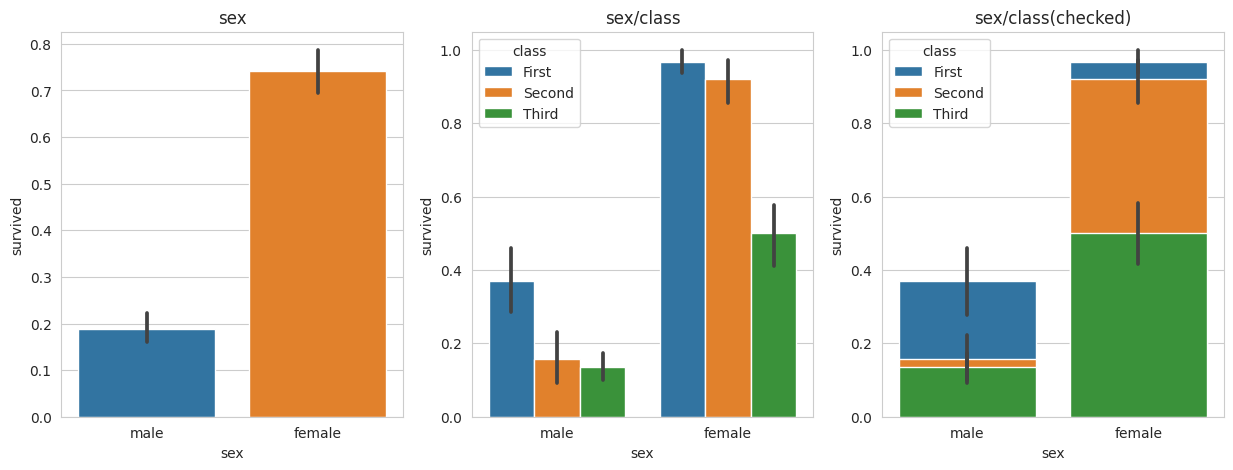

In [9]:
# %%
# 막대 그래프
# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프
sns.barplot(x="sex",
            y="survived",
            data=titanic,
            ax=ax1)

sns.barplot(x="sex",
            y="survived",
            hue = "class",
            data=titanic,
            ax=ax2)

sns.barplot(x="sex",
            y="survived",
            hue="class",
            dodge=False,
            data=titanic,
            ax=ax3)
# 제목 추가
ax1.set_title("sex")
ax2.set_title("sex/class")
ax3.set_title("sex/class(checked)")

Text(0.5, 1.0, 'class - who(stacked)')

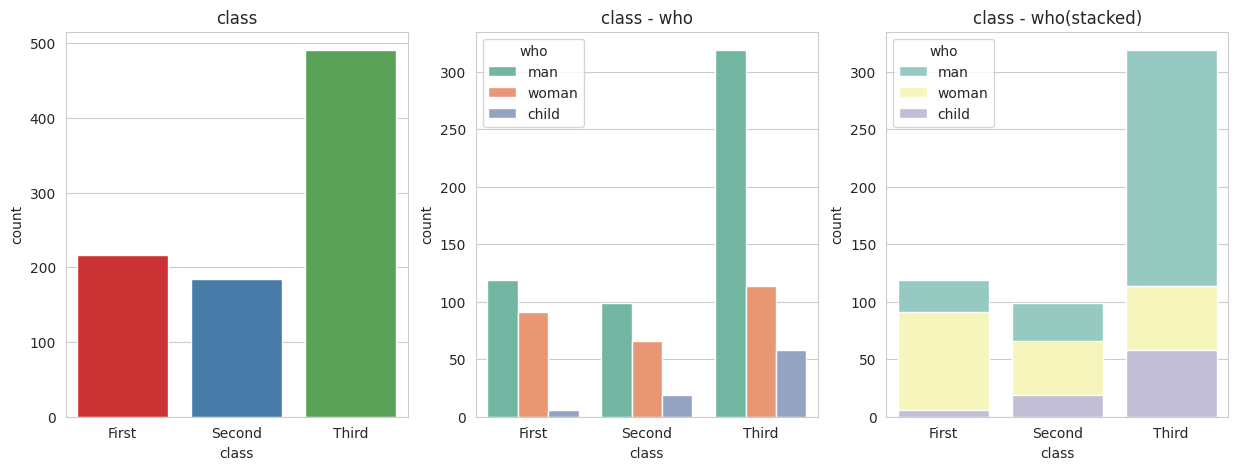

In [15]:
# %%
# 빈도 그래프
# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대그래프
sns.countplot(x="class",
              palette="Set1",
              data=titanic,
              ax=ax1)

sns.countplot(x="class",
              hue="who",
              palette="Set2",
              data=titanic,
              ax=ax2)

sns.countplot(x="class",
              hue="who",
              palette="Set3",
              dodge=False,
              data=titanic,
              ax=ax3)
# 에러바(막대기가 의미하는 것) : 표준편차, 표준오차, 신뢰구간 등등
# 제목 추가
ax1.set_title("class")
ax2.set_title("class - who")
ax3.set_title("class - who(stacked)")

<Axes: xlabel='sex', ylabel='survived'>

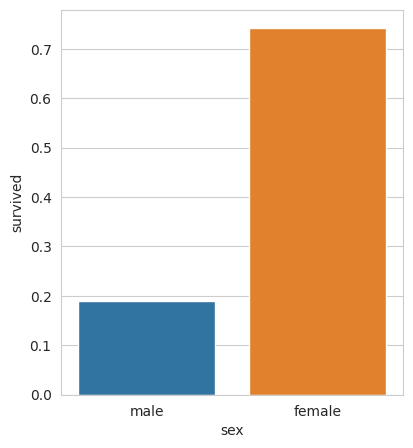

In [19]:
# %%
# 에러바 표시 x
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
sns.barplot(x="sex",
            y="survived",
            data=titanic,
            ax=ax1,
            errorbar=None)

## 박스 플롯/바이올린 그래프

<Axes: xlabel='alive', ylabel='age'>

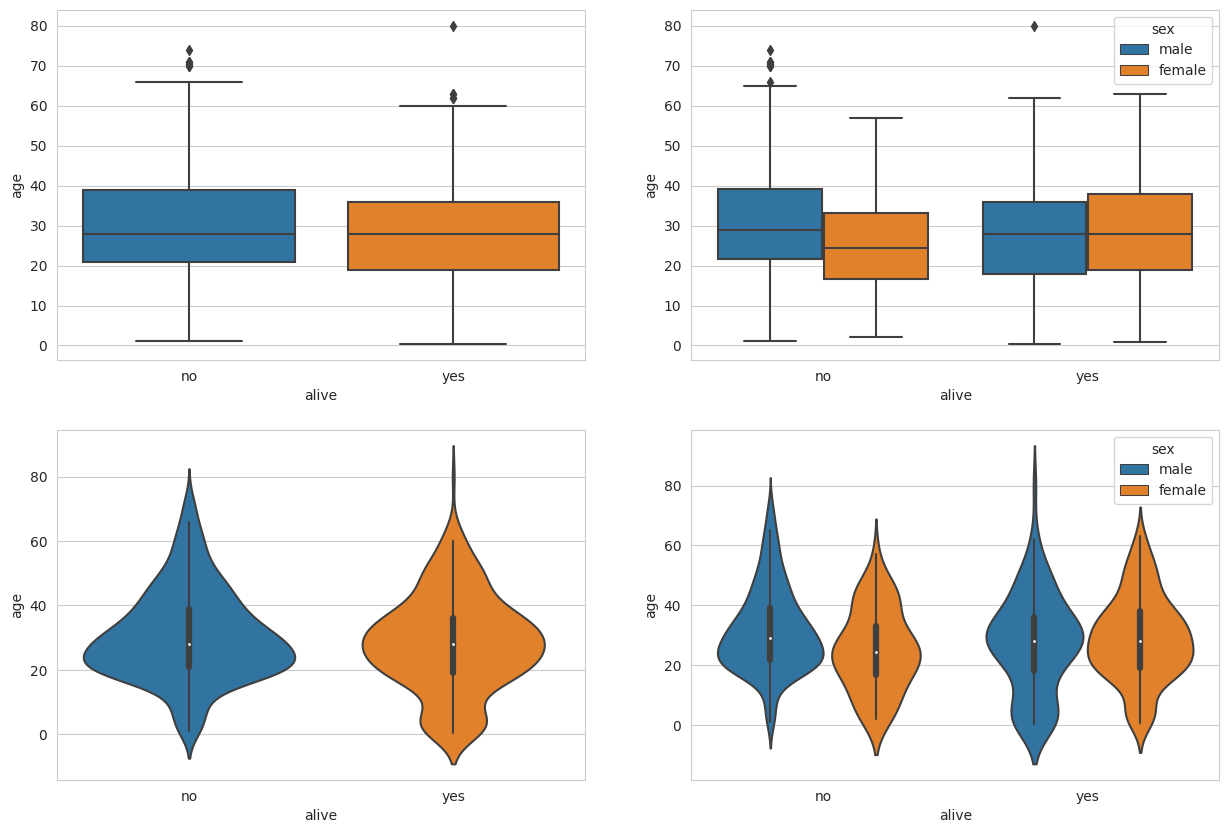

In [24]:
# %%
# 박스 플롯/바이올린 그래프
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 상자그림
sns.boxplot(x="alive",y="age",data=titanic,ax=ax1)
sns.boxplot(x="alive",y="age",hue="sex",data=titanic,ax=ax2)
# 바이올린그림
sns.violinplot(x="alive",y="age",data=titanic,ax=ax3)
sns.violinplot(x="alive",y="age",hue="sex",data=titanic,ax=ax4)


## 조인트 그래프

Text(0.5, 0.98, 'Tf - kde')

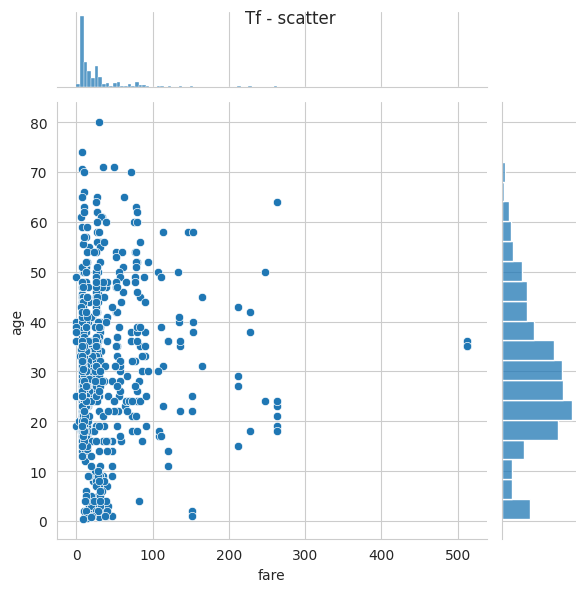

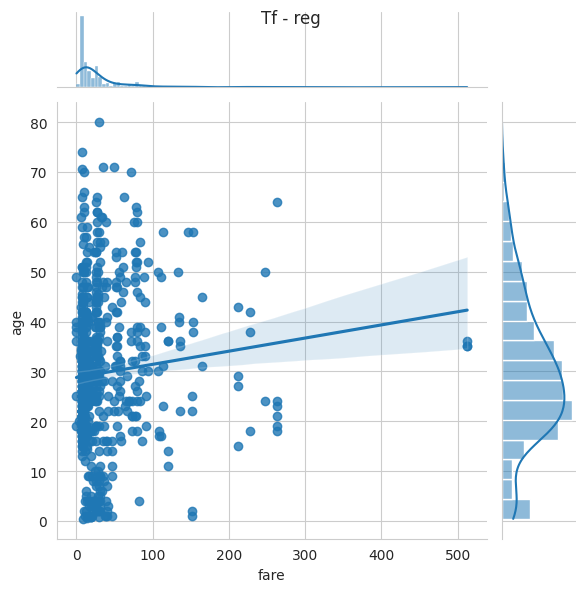

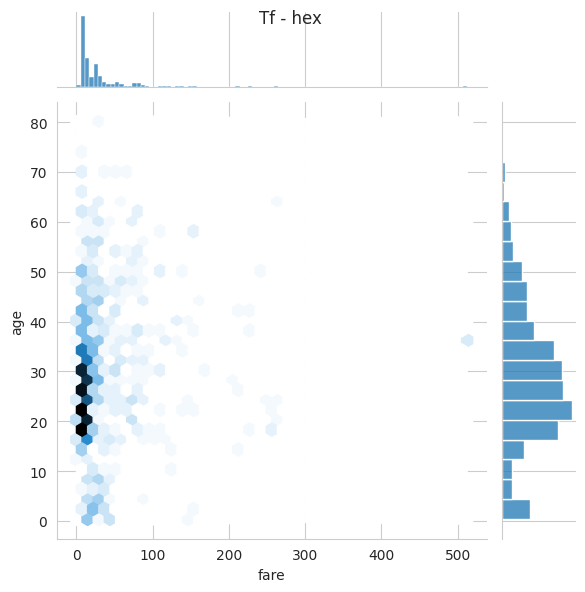

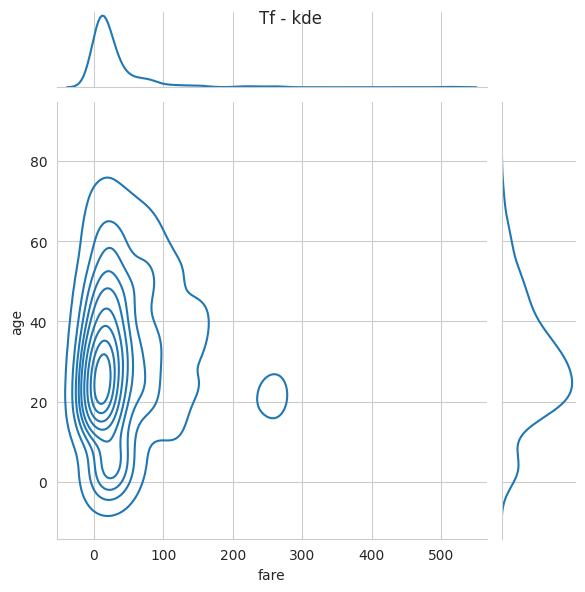

In [37]:
# %%
# 조인트 그래프
# 조인트 그림 - 산점도(기본값)
jp1 = sns.jointplot(x="fare",y="age",data=titanic)
# 조인트 그림 - 산점도 + 회귀선
jp2 = sns.jointplot(x="fare",y="age",kind="reg",data=titanic)
# 조인트 그림 - 육각 산점도
jp3 = sns.jointplot(x="fare",y="age",kind="hex",data=titanic)
# 조인트 그림 - 커널밀도함수
jp4 = sns.jointplot(x="fare",y="age",kind="kde",data=titanic)

# 제목 추가
jp1.fig.suptitle("Tf - scatter")
jp2.fig.suptitle("Tf - reg")
jp3.fig.suptitle("Tf - hex")
jp4.fig.suptitle("Tf - kde")

## 그리드 분할하기

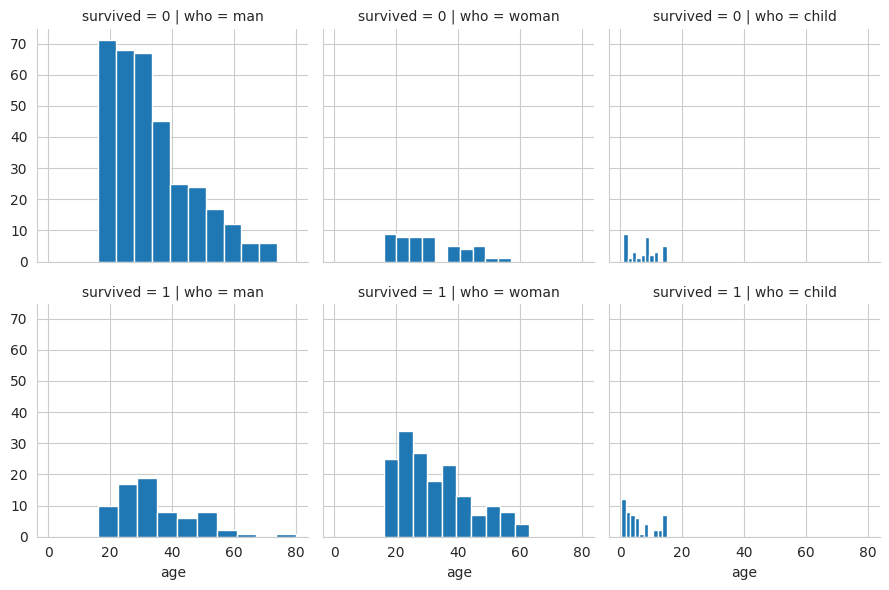

In [22]:
# %%
# 조건 적용해서 화면을 그리드로 분할하기
g=sns.FacetGrid(data=titanic,col="who",row="survived")
g=g.map(plt.hist,"age")


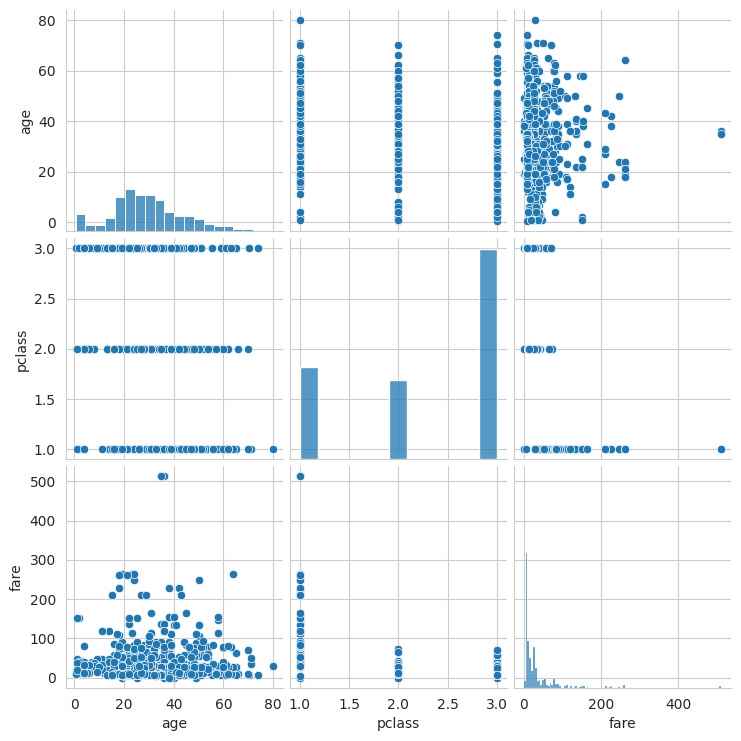

In [23]:
# %%
# 이변수 데이터의 분포
titanic_pair = titanic[["age","pclass","fare"]]
g=sns.pairplot(titanic_pair)

## 지도 만들기

In [3]:
# %%
# 지도 만들기
import folium
seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)
seoul_map.save("./seoul.html")

In [4]:
# %%
# 지도 스타일 적용하기
seoul_map2 = folium.Map(location=[37.55,126.98],tiles="Stamen Terrain",
                       zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98],tiles="Stamen Toner",
                       zoom_start=15)

seoul_map2.save("./seoul2.html")
seoul_map3.save("./seoul3.html")

In [5]:
# %%
# 지도에 마커 표시하기
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/BDA/part4/서울지역 대학교 위치.xlsx",engine="openpyxl")
seoul_map = folium.Map(location=[37.55,126.98],tiles="Stamen Terrain",
                       zoom_start=12)

for name, lat, lng in zip(df.index,df.위도,df.경도):
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)

seoul_map.save("./seoul_colleges.html")

In [6]:
# %%
# 지도 원형 마커 표시
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/BDA/part4/서울지역 대학교 위치.xlsx",engine="openpyxl")
seoul_map = folium.Map(location=[37.55,126.98],tiles="Stamen Terrain",
                       zoom_start=12)
for name, lat, lng in zip(df.index,df.위도,df.경도):
    folium.CircleMarker([lat,lng],
                        radius=10,
                        color="Brown",
                        file=True,
                        fill_color="coral",
                        fill_opacity=0.7,
                        popup=name).add_to(seoul_map)
    
seoul_map.save("./seoul_colleges2.html")

## 단계 구분도

In [9]:
# %%
# 지도 영역 단계구분도 표시
import json
file_path= r"/content/drive/MyDrive/BDA/part4/경기도인구데이터.xlsx"
df = pd.read_excel(file_path,index_col="구분",engine="openpyxl")
df.columns=df.columns.map(str)

geo_path = r"/content/drive/MyDrive/BDA/part4/경기도행정구역경계.json"

try:
    geo_data=json.load(open(geo_path,encoding="utf-8"))
except:
    geo_data=json.load(open(geo_path,encoding="utf-8-sig"))

g_map=folium.Map(location=[37.5502,126.982],
                 tiles="Stamen Terrain",zoom_start=9)

year = "2007"

folium.Choropleth(geo_data=geo_data,
                  data = df[year],
                  columns=[df.index,df[year]],
                  fill_color="YlOrRd",fill_opacity=0.7,line_opacity=0.3,
                  threshold_scale=[10000,100000,300000,500000,700000],
                  key_on = "feature.properties.name",
                  ).add_to(g_map)

g_map.save("./gyonggi_population_"+year+".html")

# 데이터 전처리

##비어 있는 값 = 누락 데이터

In [19]:
# %%
# 누락 데이터 처리
import seaborn as sns
df=sns.load_dataset("titanic")
df.info()
# deck 열의 Nan 개수 계산
nan_deck = df['deck'].value_counts(dropna=False)
print(nan_deck)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G 

In [17]:
# Null값을 직접 확인 = R isna()
# isnull () # 널값이면 True, 아니면 False
# notnull () # 널값이면 False, 아니면 True
df.head().isnull()
# isnull() 메소드로 누락 데이터 찾기
print(df.head().isnull())
# notnull() 메소드로 누락 데이터 찾기
print(df.head().notnull())
# isnull() 메소드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0)) # axis=0 없어도 같은 결과임

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  
   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True

In [20]:
# %%
# 반복문을 돌려서 전체 열에 대한 널값 개수
for col in df.columns:
    print(df[col].isnull().value_counts())

# 널값이 많은 열 삭제 - 600개 이상이 널값이 삭제
df.dropna(axis=1,thresh=600)

False    891
Name: survived, dtype: int64
False    891
Name: pclass, dtype: int64
False    891
Name: sex, dtype: int64
False    714
True     177
Name: age, dtype: int64
False    891
Name: sibsp, dtype: int64
False    891
Name: parch, dtype: int64
False    891
Name: fare, dtype: int64
False    889
True       2
Name: embarked, dtype: int64
False    891
Name: class, dtype: int64
False    891
Name: who, dtype: int64
False    891
Name: adult_male, dtype: int64
True     688
False    203
Name: deck, dtype: int64
False    889
True       2
Name: embark_town, dtype: int64
False    891
Name: alive, dtype: int64
False    891
Name: alone, dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [18]:
# %%
# 누락 데이터 제거
df=sns.load_dataset("titanic")
df.info()
missing_df=df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()

    try:
        print(col,': ',missing_count[True])
    except:
        print(col,": ", 0)    


# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1,thresh=500)
print(df_thresh.columns)

# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891개 중 177개의 NaN 값)
df_age=df.dropna(subset="age",how="any",axis=0)
print(len(df_age))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
e

## Null값 대체 imputation

In [21]:
# %%
# 평균으로 누락 데이터 바꾸기
df = sns.load_dataset("titanic")
print(df["age"].head(10))
print("\n")

mean_age = df["age"].mean(axis=0)
# 평균으로 대체
df["age"].fillna(mean_age,inplace=True)

print(df["age"].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [23]:
# %%
# 가장 많이 나타나는 값을 바꾸기
df = sns.load_dataset("titanic")
print(df["embark_town"][825:830])
print("\n")

# embark_town 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df["embark_town"].value_counts(dropna=True).idxmax()
print(most_freq)
print("\n")

df["embark_town"].fillna(most_freq,inplace=True)

# embark_town 열 829행의 NaN 데이터 출력(NaN 값이 most_freq값으로 대체)
print(df["embark_town"][825:830])


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


Southampton


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [27]:
# %%
# 이웃하고 있는 값으로 바꾸기
df = sns.load_dataset("titanic")

# embark_town 열 829 행의 NaN 데이터 출력
print(df["embark_town"][825:830])
print("\n")

# embark_town 열의 NaN 값을 바로 앞에 있는 828행의 값으로 변경하기
# 앞에 있는 값으로 대체 = ffill 
df["embark_town"].fillna(method="ffill", inplace=True)
# 뒤에 있는 값으로 대체 = bfill 
#df["embark_town"].fillna(method="bfill", inplace=True)
print(df["embark_town"][825:830])


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
Name: embark_town, dtype: object


## 중복데이터

In [29]:
# %%
## 중복 데이터 처리
import pandas as pd
df=pd.DataFrame({"c1":["a","a","b","a","b"],
                 "c2":[1,1,1,2,2],
                 "c3":[1,1,2,2,2]})

print(df)
print("\n")

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print("\n")

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


0    False
1     True
2    False
3    False
4    False
dtype: bool




In [31]:
# %%
# 중복 데이터 확인
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup=df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [33]:
# %%
# 중복 데이터 제거
df=pd.DataFrame({"c1":["a","a","b","a","b"],
                 "c2":[1,1,1,2,2],
                 "c3":[1,1,2,2,2]})

print(df)
print("\n")

# 데이터프레임에서 중복 행 제거
df2 = df.drop_duplicates()
print(df2)
print("\n")

df3 = df.drop_duplicates(subset=["c2","c3"])
print(df3)
# 185P 끝

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


# 데이터 표준화

## 단위 환산

In [48]:
# %%
# 단위 환산
# 데이터 표준화
import pandas as pd 

df=pd.read_csv(r'/content/drive/MyDrive/BDA/part4/auto-mpg.csv', header=None)

df.columns = ["mpg","cylinders","displacement","horsepower",
            "weight","acceleration","model year","origin","name"]
print(df.head(3))

# 연비 mpg = mile per gallon
# kpl = kilometer per liter
# 1 mpg = 0.425 kpl
# kpl = 0.425
mpg_to_kpl = 1.60934/3.78541

df["kpl"] = df["mpg"] * mpg_to_kpl
print(df.head(3))

df["kpl"] = df["kpl"].round(2)
print(df.head(3))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name       kpl  
0       1  chevrolet chevelle malibu  7.652571  
1       1          buick skylark 320  6.377143  
2       1         plymouth satellite  7.652571 

### 자료형 변환

In [59]:
# %%
# 자료형 변환
# 자료형 확인
df=pd.read_csv(r'/content/drive/MyDrive/BDA/part4/auto-mpg.csv', header=None)

df.columns = ["mpg","cylinders","displacement","horsepower",
            "weight","acceleration","model year","origin","name"]

print(df.dtypes)
print("\n")

# horsepower 열의 고유값 확인
print(df["horsepower"].unique())
print("\n")

# 누락 데이터("?") 삭제
import numpy as np
df["horsepower"].replace("?",np.nan, inplace=True)
df.dropna(subset=["horsepower"], axis=0,inplace=True)
df["horsepower"]=df["horsepower"].astype("float")

print(df["horsepower"].dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


float6

In [60]:
# %%
# 숫자가 문자열로 저장되어 있다면 숫자로 변환 = 연속형 변수
# 자료형
df.dtypes
print(df["origin"].unique())


[1 3 2]


In [61]:
# %%
# 정수형 데이터를 문자열 데이터로 변환
df["origin"].replace({1:"USA",2:"EU",3:"JPN"}, inplace=True)

print(df["origin"].unique())
print(df["origin"].dtypes)

['USA' 'JPN' 'EU']
object


In [54]:
# %%

# 문자열 -> 범주형 변환
df["origin"] = df["origin"].astype("category")
print(df["origin"].dtypes)

# 범주형 -> 문자열 변환
df["origin"] = df["origin"].astype("str")
print(df["origin"].dtypes)

category
object


In [55]:
# %%
# model year 열의 정수형을 범주형으로 변환
print(df["model year"].sample(3))
df["model year"] = df["model year"].astype("category")
print(df["model year"].sample(3))
# 191p

1      70
214    76
379    82
Name: model year, dtype: int64
368    82
172    75
372    82
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]
